<a href="https://colab.research.google.com/github/sudishaG/Clustering/blob/main/Hierarchical_ISL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import \
(KMeans ,
AgglomerativeClustering)
from scipy.cluster.hierarchy import \
(dendrogram ,
cut_tree,
linkage) # Import linkage here
!pip install ISLP
from scipy.cluster.hierarchy import dendrogram
from ISLP.cluster import compute_linkage

Scikit-learn version: 1.6.1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 828.2/828.2 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 10.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=2f6601a0a4dd3c89a2fe3ae248f4ec2b031b80a3368fc8cc6020814df521bf3e
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [4]:
np.random.seed(0);
X = np.random.standard_normal((50,2));
X[:25,0] += 3;
X[:25,1] -= 4;
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
n_clusters=None ,
linkage='complete')
hc_comp.fit(X)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

In [6]:
D = np.zeros((X.shape[0], X.shape[0]));
for i in range(X.shape[0]):
  x_ = np.multiply.outer(np.ones(X.shape[0]), X[i])
  D[i] = np.sqrt(np.sum((X - x_)**2, 1));
hc_sing_pre = HClust(distance_threshold=0,
  n_clusters=None ,
  metric='precomputed',
  linkage='single')
hc_sing_pre.fit(D)

AgglomerativeClustering(distance_threshold=0, linkage='single',
                        metric='precomputed', n_clusters=None)

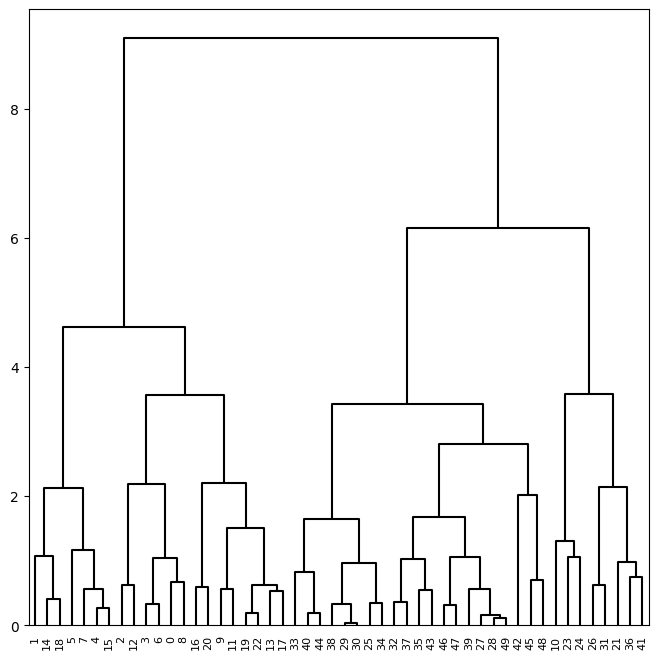

In [13]:
cargs = {'color_threshold':-np.inf ,
  'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_comp)
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp ,
  ax=ax,**cargs);

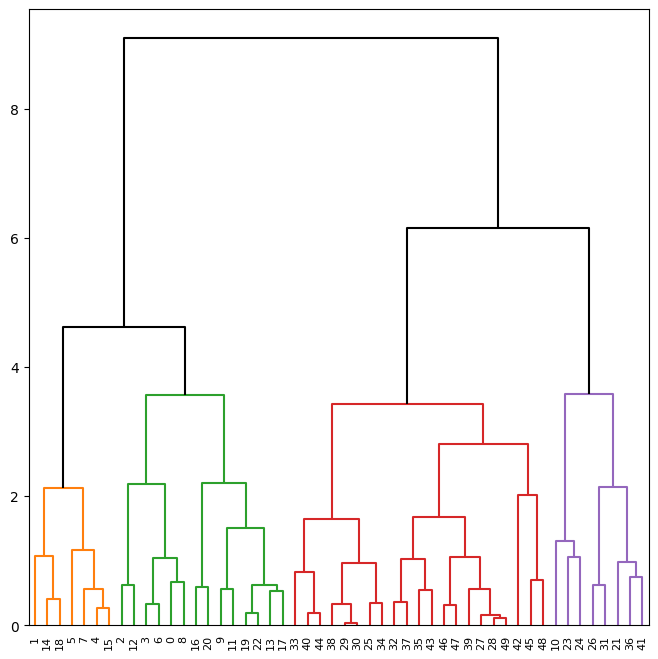

In [15]:
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp , ax=ax,
  color_threshold=4, above_threshold_color='black');

In [16]:
cut_tree(linkage_comp , n_clusters=4).T

array([[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2,
        0, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3,
        3, 3, 3, 3, 3, 3]])

In [17]:
cut_tree(linkage_comp , height=5)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2]])

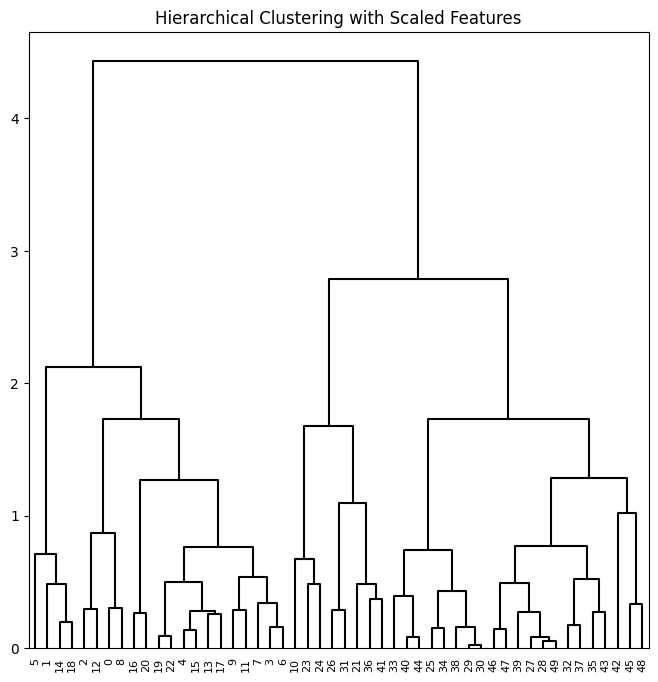

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
hc_comp_scale = HClust(distance_threshold=0,
n_clusters=None ,
linkage='complete').fit(X_scale)
linkage_comp_scale = compute_linkage(hc_comp_scale)
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp_scale , ax=ax, **cargs)
ax.set_title("Hierarchical Clustering with Scaled Features");

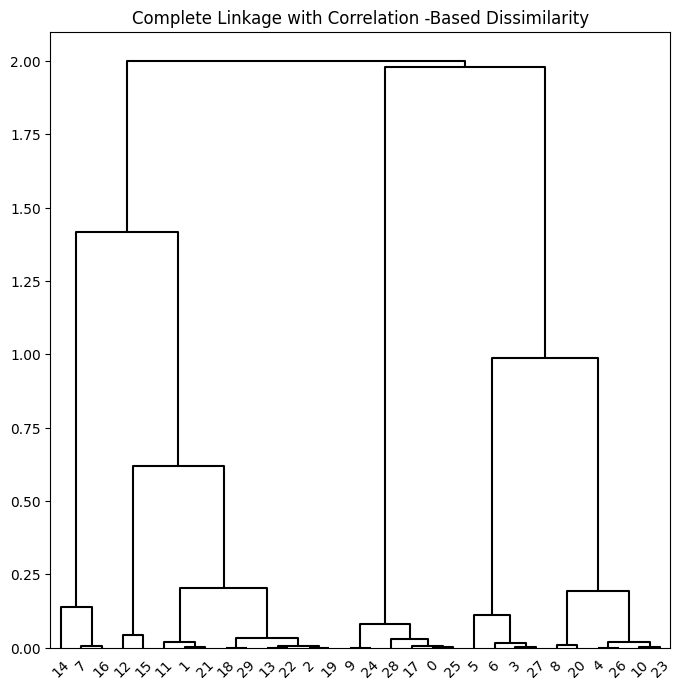

In [21]:
X = np.random.standard_normal((30, 3))
corD = 1 - np.corrcoef(X)
hc_cor = HClust(linkage='complete',
  distance_threshold=0,
  n_clusters=None ,
  metric='precomputed')
hc_cor.fit(corD)
linkage_cor = compute_linkage(hc_cor)
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_cor , ax=ax, **cargs)
ax.set_title("Complete Linkage with Correlation -Based Dissimilarity");